In [30]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np

def create_model(input_shape):
    model = models.Sequential()
    
    # Fully connected layer
    model.add(layers.Dense(3072, input_shape=input_shape, activation='relu'))
    
    # Reshape to a 2D matrix
    model.add(layers.Reshape((32, 32, 3)))

    # Upsample to match cover image shape
    model.add(layers.UpSampling2D(size=(cover_image_shape[0]//32, cover_image_shape[1]//32)))

    return model

# Example usage
M = 3072  # Length of input binary data
cover_image_shape = (256, 256, 3)  # Shape of the cover image (H x W x 3)

binary_data_str = "01010111011000010111010001100101011100100110110101100001011100100110101101101001011011100110011110100101101010001001100110100100010011001010000001000100000110011110110111101000010000000000000000000000"
# Convert binary string to a NumPy array of integers
input_binary_data = np.array([int(bit) for bit in binary_data_str], dtype=np.uint8)

# Reshape to the desired shape (adjust as needed)
input_binary_data = input_binary_data.reshape((1, 1, -1))  # Add an extra dimension

# Ensure the length of input_binary_data matches the value of M
M = 3072
input_binary_data = input_binary_data[:, :, :M]
print(input_binary_data.shape)

# Create and compile the model with the correct input shape
model = create_model(input_shape=(1, 200))
model.compile(optimizer='adam', loss='mse')  # Adjust loss function as needed

# Reshape and upsample
result = model.predict(input_binary_data)

# Print the result
print(result.shape)


(1, 1, 200)
1/1 [==============================] - 0s 58ms/step
(1, 256, 256, 3)


1/1 [==============================] - 0s 57ms/step
Skipping visualization for dense_8 as it doesn't produce 4D feature maps.
1/1 [==============================] - 0s 61ms/step


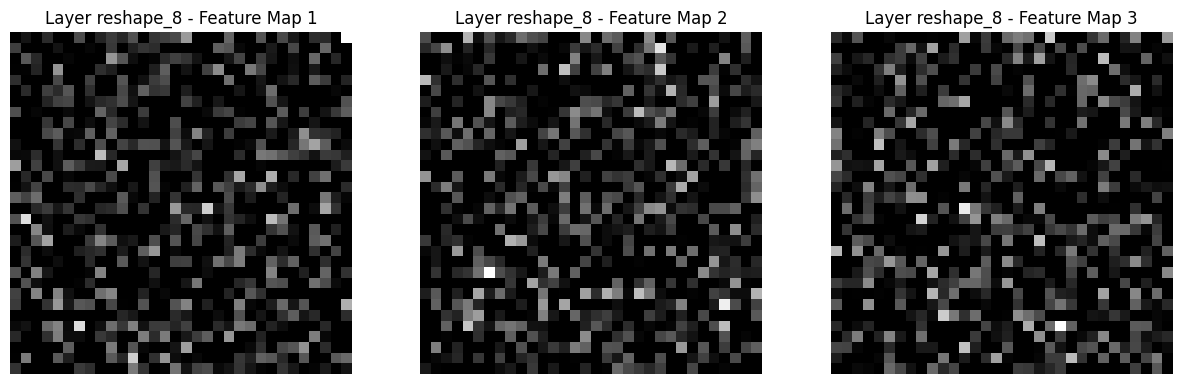

1/1 [==============================] - 0s 61ms/step


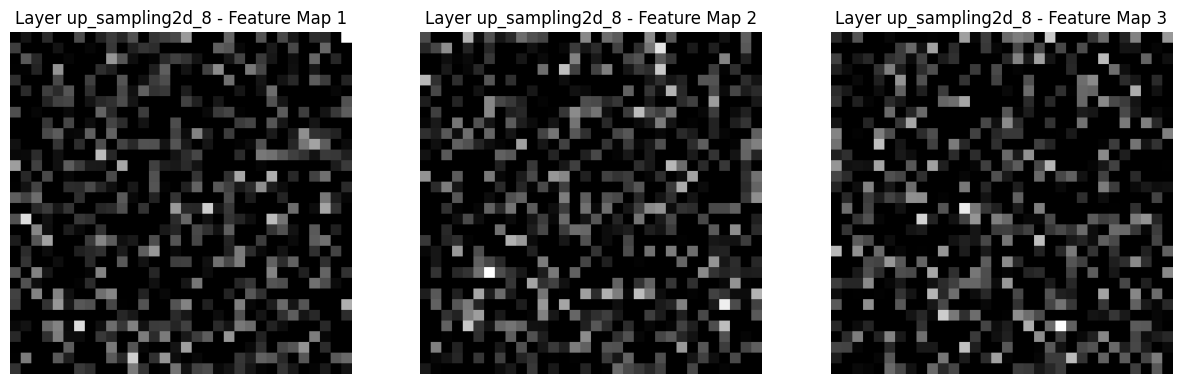

1/1 [==============================] - 0s 61ms/step


IndexError: list index out of range

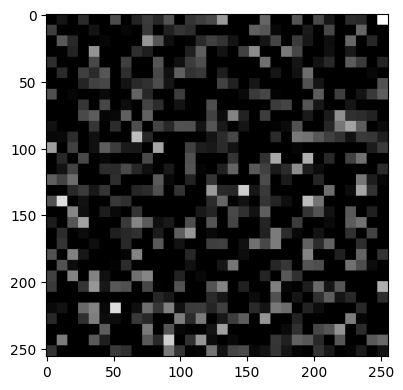

In [32]:
import tensorflow as tf
from tensorflow.keras import models
import matplotlib.pyplot as plt

# Assuming 'model' is the neural network model created earlier

# Extract intermediate feature maps
layer_names = ['dense_8', 'reshape_8', 'up_sampling2d_8']
intermediate_layer_models = [models.Model(inputs=model.input, outputs=model.get_layer(layer_name).output) for layer_name in layer_names]

# Assuming 'result' is the output from the neural network
result = model.predict(input_binary_data)

# Include the layer responsible for the upsampled image
upsampled_layer_model = models.Model(inputs=model.input, outputs=model.output)
intermediate_layer_models.append(upsampled_layer_model)

# Display the feature maps
for i, layer_model in enumerate(intermediate_layer_models):
    intermediate_result = layer_model.predict(input_binary_data)

    if len(intermediate_result.shape) == 4:
        num_feature_maps = intermediate_result.shape[-1]

        plt.figure(figsize=(15, 6))
        for j in range(num_feature_maps):
            plt.subplot(1, num_feature_maps, j + 1)
            plt.imshow(intermediate_result[0, :, :, j], cmap='gray')
            plt.title(f'Layer {layer_names[i]} - Feature Map {j + 1}')
            plt.axis('off')

        plt.show()
    else:
        print(f"Skipping visualization for {layer_names[i]} as it doesn't produce 4D feature maps.")


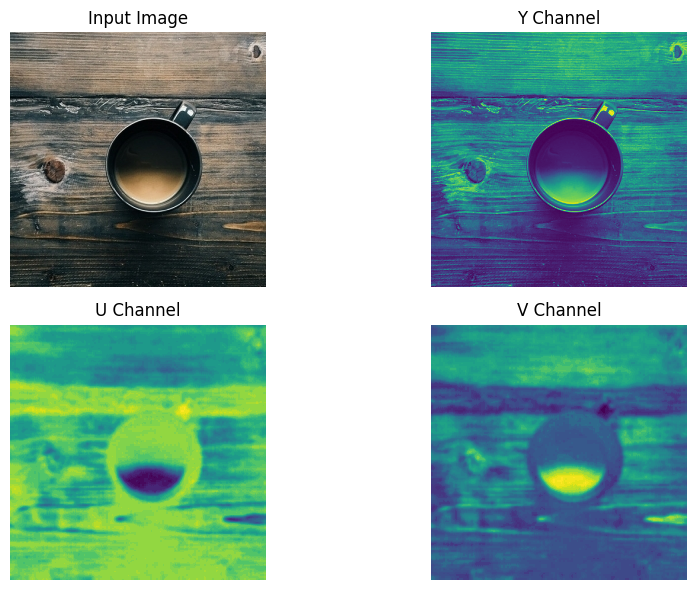

In [39]:
import cv2
import matplotlib.pyplot as plt

# Load the image in RGB color space
image_path = "22.jpg"  # Replace with the path to your image
rgb_image = cv2.imread(image_path, cv2.IMREAD_COLOR)
rgb_image = cv2.cvtColor(rgb_image, cv2.COLOR_BGR2RGB)

# Convert RGB to YUV color space
yuv_image = cv2.cvtColor(rgb_image, cv2.COLOR_RGB2YUV)

# Extract Y, U, and V channels
y_channel, u_channel, v_channel = cv2.split(yuv_image)

# Plot the images
plt.figure(figsize=(10, 6))

# Plot RGB image
plt.subplot(2, 2, 1)
plt.imshow(rgb_image)
plt.title("Input Image")
plt.axis("off")

# Plot Y channel
plt.subplot(2, 2, 2)
plt.imshow(y_channel)
plt.title("Y Channel")
plt.axis("off")

# Plot U channel
plt.subplot(2, 2, 3)
plt.imshow(u_channel)
plt.title("U Channel")
plt.axis("off")

# Plot V channel
plt.subplot(2, 2, 4)
plt.imshow(v_channel)
plt.title("V Channel")
plt.axis("off")

plt.tight_layout()
plt.show()
